In [1]:
import pyaudio
import math
import matplotlib.pyplot as plt

import numpy as np

In [2]:
# import wave

# with wave.open('papa fuhr stets ohne.wav', 'rb') as wf:
#     print(wf.getparams())

In [3]:
import operator

def test(a,b,comp):
    assert comp(a,b), f'{a} does not {comp.__name__} {b}'
    
def test_eq(a,b):
    test(a,b,operator.eq)

In [4]:
TEST = 'test'

In [5]:
test_eq(TEST, 'test')

In [6]:
def test_near(a,b,eps=1e-4):
    assert abs(a - b) < eps, f'{a} not within {eps} of {b}'

In [7]:
audioport = pyaudio.PyAudio()

In [8]:
framerate = 44100

In [9]:
math.sin(math.pi/2)

1.0

In [10]:
# class SineGen():
#     def __init__(self, freq, amp=1):
#         self.freq = freq
#         self.amp = amp
#         self.time = []
    
#     def get_frame(self, in_data, frame_count, time_info, status):
#         frame = []
#         for i in range(frame_count):           
#             t = time_info['output_buffer_dac_time'] + i / framerate
#             self.time.append(t)
#             frame.append(self.amp * self.sine_at_time(t))
#         return (np.array(frame, dtype=np.float32).tobytes(), pyaudio.paContinue)
        
#     def sine_at_time(self, t):
#         return math.sin(2 * math.pi * t * self.freq)

In [83]:
class SineGen():
    def __init__(self, freq, amp=1):
        self.freq = freq
        self.amp = amp
        self.phase = 0
        self.sine_gen = self.sine_frame()
    
    def get_frame(self, in_data, frame_count, time_info, status):
        frame = []
        for f in range(frame_count):
            frame.append(next(self.sine_gen))
        return (np.array(frame, dtype=np.float32).tobytes(), pyaudio.paContinue)
        
    def sine_frame(self):
        while True:
            yield self.amp * math.sin(self.phase)
            self.phase += 2 * math.pi * self.freq / framerate

In [84]:
sine = SineGen(440, amp=0.8)

In [ ]:
sine.get_frame(
    None, 
    1024, 
    {
        'input_buffer_adc_time': 0.0, 
        'current_time': 595785.053391073, 
        'output_buffer_dac_time': 595785.079476747
    }, 
    None)

In [70]:
# test_near(0, sine.sine_at_time(0))
# test_near(0, sine.sine_at_time(1/440))
# test_near(0, sine.sine_at_time(2/440))
# test_near(0, sine.sine_at_time(1.5/440))
# test_near(1, sine.sine_at_time(1.25/440))

In [71]:
# plt.plot([sine.sine_at_time(t/framerate) for t in range(440)])

In [72]:
sine.amp

0.8

In [73]:
# plt.plot(sine.get_frame(
#     None, 
#     1024, 
#     {
#         'input_buffer_adc_time': 0.0, 
#         'current_time': 595785.053391073, 
#         'output_buffer_dac_time': 595785.079476747
#     }, 
#     None)[0])

In [74]:
# test_data = sine.get_frame(
#     None, 
#     1024, 
#     {
#         'input_buffer_adc_time': 0.0, 
#         'current_time': 595785.053391073, 
#         'output_buffer_dac_time': 595785.079476747
#     }, 
#     None)[0]

# test(np.array(test_data).astype(np.float32), np.array(test_data, dtype=np.float32), np.array_equal)

In [75]:
# np.array(sine.get_frame(
#     None, 
#     1024, 
#     {
#         'input_buffer_adc_time': 0.0, 
#         'current_time': 595785.053391073, 
#         'output_buffer_dac_time': 595785.079476747
#     }, 
#     None)[0]).astype(np.float32).tobytes()

In [89]:
stream = audioport.open(rate=framerate, channels=1, format=pyaudio.paFloat32, output=True, stream_callback=sine.get_frame)

In [90]:
stream.start_stream()

In [91]:
stream.stop_stream()

In [65]:
# len(sine.time)

In [66]:
# plt.plot(sine.time)

In [32]:
# diff = []
# for i in range(len(sine.time) - 1):
#     diff.append(sine.time[i+1] - sine.time[i])

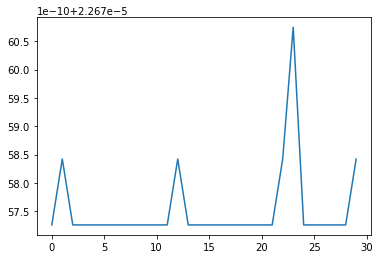

In [40]:
# plt.plot(diff[1000:1030])

In [88]:
sine = SineGen(330, amp=0.1)